# LINK FOR GEOPANDAS:
https://medium.com/@ianforrest11/graphing-latitudes-and-longitudes-on-a-map-bf64d5fca391

# SHAPEFILES:
https://data.humdata.org/dataset/nepal-municipalities
https://geodata.lib.berkeley.edu/catalog/sde-columbia-iscgm_nepal_2008_polbndl

In [91]:
import pandas as pd

In [92]:
buildings = pd.read_csv('csv_building_structure.csv')
names = pd.read_csv('ward_vdcmun_district_name_mapping.csv')

In [93]:
buildings.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


In [94]:
names.head()

,ward_id,vdcmun_id,vdcmun_name,district_id,district_name
0,120101,1201,Champadevi Rural Municipality,12,Okhaldhunga
1,120102,1201,Champadevi Rural Municipality,12,Okhaldhunga
2,120103,1201,Champadevi Rural Municipality,12,Okhaldhunga
3,120104,1201,Champadevi Rural Municipality,12,Okhaldhunga
4,120105,1201,Champadevi Rural Municipality,12,Okhaldhunga


In [95]:
df = buildings.merge(names, left_on = ['district_id', 'vdcmun_id', 'ward_id'], right_on = ['district_id', 'vdcmun_id', 'ward_id'])

In [96]:
df[['building_id','district_id','vdcmun_id']]

,building_id,district_id,vdcmun_id
0,120101000011,12,1207
1,120101000021,12,1207
2,120101000031,12,1207
3,120101000041,12,1207
4,120101000051,12,1207
...,...,...,...
762101,366705001261,36,3603
762102,366705001271,36,3603
762103,366705001281,36,3603
762104,366705001291,36,3603


In [97]:
# df.to_csv('location_names')

In [98]:
df.district_id.unique()

array([12, 20, 21, 22, 23, 24, 28, 29, 30, 31, 36])

In [99]:
df.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed',
       'vdcmun_name', 'district_name'],
      dtype='object')

In [100]:
# need to dropna() to simplify data-cleaning

df = df.dropna()

df

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,...,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,vdcmun_name,district_name
0,120101000011,12,1207,120703,1,1,9,288,9,9,...,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair,Siddhicharan Municipality,Okhaldhunga
1,120101000021,12,1207,120703,1,1,15,364,9,9,...,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction,Siddhicharan Municipality,Okhaldhunga
2,120101000031,12,1207,120703,1,1,20,384,9,9,...,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Siddhicharan Municipality,Okhaldhunga
3,120101000041,12,1207,120703,1,1,20,312,9,9,...,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair,Siddhicharan Municipality,Okhaldhunga
4,120101000051,12,1207,120703,1,1,30,308,9,9,...,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair,Siddhicharan Municipality,Okhaldhunga
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762101,366705001261,36,3603,360301,2,0,12,430,12,0,...,1,0,0,0,0,Damaged-Rubble Clear-New building built,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha
762102,366705001271,36,3603,360301,2,0,25,420,12,0,...,1,0,0,0,0,Damaged-Rubble clear,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha
762103,366705001281,36,3603,360301,2,0,45,408,12,0,...,1,0,0,0,0,Damaged-Rubble unclear,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha
762104,366705001291,36,3603,360301,2,0,4,493,12,0,...,1,0,0,0,0,Damaged-Rubble unclear,Grade 5,Reconstruction,Barpak Sulikot Rural Municipality,Gorkha


In [101]:
len(df.vdcmun_name.unique())

106

In [102]:
!pip install geopy

In [103]:
coordinate_list = []

from geopy.geocoders import Nominatim
for name in list(df['vdcmun_name'].unique()):
    geolocator = Nominatim(user_agent='msba')
    location = geolocator.geocode(name)
    if len(str(type(location))) > 18: # some locations cannot be automatically recognized and must be manually entered in later
        coordinate_list.append([location.latitude, location.longitude])

In [104]:
# getting the list of municipality names that can be plotted automatically

mun_names_list = []
for name in list(df['vdcmun_name'].unique()):
    geolocator = Nominatim(user_agent='msba')
    location = geolocator.geocode(name)
    if len(str(type(location))) > 18: # some locations cannot be automatically recognized and must be manually entered in later
        mun_names_list.append(name)

mun_names_list

['Sunkoshi Rural Municipality',
 'Manebhanjyang Rural Municipality',
 'Molung Rural Municipality',
 'Likhu Rural Municipality',
 'Kamalamai Municipality',
 'Marin Rural Municipality',
 'Phikkal Rural Municipality',
 'Sunapati Rural Municipality',
 'Manthali  Municipality',
 'Ramechhap Municipality',
 'Bigu Rural Municipality',
 'Kalinchowk Rural Municipality',
 'Bhimeshwor Municipality',
 'Tamakoshi Rural Municipality',
 'Shailung Rural Municipality',
 'Gaurishankar Rural Municipality',
 'Jiri Municipality',
 'Lisankhu Pakhar Rural Municipality',
 'Panchpokhari Thangpal Rural Municipality',
 'Jugal Rural Municipality',
 'Balephi Rural Municipality',
 'Tripurasundari Rural Municipality',
 'Bahrabise Municipality',
 'Bhotekoshi Rural Municipality',
 'Helambu Rural Municipality',
 'Panauti Municipality',
 'Banepa Municipality',
 'Dhulikhel Municipality',
 'Suryagadhi Rural Municipality',
 'Dupcheshwor Rural Municipality',
 'Belkotgadhi Municipality',
 'Panchakanya Rural Municipality',
 'K

In [105]:
coordinate_list

[[27.7028314, 85.7586294],
 [27.2131922, 86.4451299],
 [27.35783055, 86.42705411965261],
 [27.88714535, 85.21682899147578],
 [27.226099599999998, 85.95630793590517],
 [27.2644204, 85.7328828],
 [26.8956801, 88.065698],
 [27.7164618, 85.4288986],
 [27.4324696, 85.30868988517341],
 [28.7540404, 83.6873331],
 [27.8402896, 86.0528997345248],
 [27.7574213, 86.0343672],
 [27.6792304, 86.01967889574162],
 [27.6198112, 86.0780481],
 [27.6389029, 85.9630709],
 [28.2780157, 83.9362322],
 [27.6369007, 86.0651877],
 [27.6535865, 85.8452491738658],
 [28.008394850000002, 85.6493845522418],
 [28.0197239, 85.7843038],
 [27.7327903, 85.7801983],
 [27.7689843, 85.9543414],
 [27.787806, 85.899582],
 [27.932976, 85.90581632353909],
 [28.00597815, 85.5313207660362],
 [27.5905828, 85.50702049791184],
 [27.6298503, 85.52032400191217],
 [27.6001049, 85.5764575],
 [27.9465535, 85.2362028228777],
 [27.9083649, 85.238688],
 [27.8261946, 85.10893098675476],
 [27.890907849999998, 85.30126180777873],
 [28.035414250

In [106]:
latitude_list = []
longitude_list = []

for item in coordinate_list:
    latitude_list.append(item[0])
    longitude_list.append(item[1])

latitude_list

[27.7028314,
 27.2131922,
 27.35783055,
 27.88714535,
 27.226099599999998,
 27.2644204,
 26.8956801,
 27.7164618,
 27.4324696,
 28.7540404,
 27.8402896,
 27.7574213,
 27.6792304,
 27.6198112,
 27.6389029,
 28.2780157,
 27.6369007,
 27.6535865,
 28.008394850000002,
 28.0197239,
 27.7327903,
 27.7689843,
 27.787806,
 27.932976,
 28.00597815,
 27.5905828,
 27.6298503,
 27.6001049,
 27.9465535,
 27.9083649,
 27.8261946,
 27.890907849999998,
 28.035414250000002,
 27.9114128,
 27.8223196,
 27.84997555,
 27.96530815,
 28.029215800000003,
 28.019255299999998,
 28.1118914,
 28.0709881,
 27.8210177,
 28.0883848,
 27.74742295,
 27.7369344,
 27.9197712,
 27.750042200000003,
 27.84689855,
 28.22594895,
 27.6312936,
 27.436213600000002,
 27.433629600000003,
 27.53323355,
 27.601665,
 27.6098398,
 27.342110050000002,
 27.601665,
 27.4860747,
 27.59116695,
 28.0250615,
 28.11938875,
 28.2357608,
 27.986618550000003,
 28.2357608,
 28.3131299,
 28.202909]

In [194]:
latitude_df = pd.Series(latitude_list)
longitude_df = pd.Series(longitude_list)
municipality_df = pd.Series(mun_names_list)

In [195]:
# convert damage_grade to numbers
def take_last_int(s):
    s = str(s)
    s = s.split()
    return s[-1]

df['damage_grade_int'] = df['damage_grade'].map(take_last_int)

df['damage_grade_int'] = pd.to_numeric(df['damage_grade_int'])



In [196]:
municipal_damage = df.groupby(['vdcmun_name'])[['damage_grade_int']].mean()

municipal_damage = municipal_damage.reset_index()

municipal_damage_filtered = municipal_damage[municipal_damage['vdcmun_name'].isin(mun_names_list)].reset_index(drop=True)

In [197]:
municipal_damage_filtered

,vdcmun_name,damage_grade_int
0,Aarughat Rural Municipality,4.351697
1,Ajirkot Rural Municipality,4.591617
2,Bagmati Rural Municipality,2.278523
3,Bahrabise Municipality,4.770229
4,Bakaiya Rural Municipality,2.616548
...,...,...
61,Tamakoshi Rural Municipality,4.419964
62,Thaha Municipality,3.112463
63,Thakre Rural Municipality,4.025196
64,Tripurasundari Rural Municipality,4.393470


In [198]:
coordinate_df = pd.concat([latitude_df,longitude_df,municipality_df],axis=1)

coordinate_df.columns = ['latitude','longitude','municipality']

In [199]:
coordinate_df = coordinate_df.sort_values(by='municipality',ascending=True)

In [200]:
coordinate_df = coordinate_df.reset_index(drop=True)

coordinate_df

,latitude,longitude,municipality
0,28.119389,84.814147,Aarughat Rural Municipality
1,28.235761,84.685482,Ajirkot Rural Municipality
2,27.601665,85.187105,Bagmati Rural Municipality
3,27.787806,85.899582,Bahrabise Municipality
4,27.342110,85.209016,Bakaiya Rural Municipality
...,...,...,...
61,27.619811,86.078048,Tamakoshi Rural Municipality
62,27.631294,85.084793,Thaha Municipality
63,27.736934,85.063571,Thakre Rural Municipality
64,27.768984,85.954341,Tripurasundari Rural Municipality


In [201]:
coordinate_df2 = pd.concat([coordinate_df,municipal_damage_filtered['damage_grade_int']],axis=1)

In [202]:
coordinate_df2.to_csv('partial coordinates.csv')

In [203]:
coordinate_df2

,latitude,longitude,municipality,damage_grade_int
0,28.119389,84.814147,Aarughat Rural Municipality,4.351697
1,28.235761,84.685482,Ajirkot Rural Municipality,4.591617
2,27.601665,85.187105,Bagmati Rural Municipality,2.278523
3,27.787806,85.899582,Bahrabise Municipality,4.770229
4,27.342110,85.209016,Bakaiya Rural Municipality,2.616548
...,...,...,...,...
61,27.619811,86.078048,Tamakoshi Rural Municipality,4.419964
62,27.631294,85.084793,Thaha Municipality,3.112463
63,27.736934,85.063571,Thakre Rural Municipality,4.025196
64,27.768984,85.954341,Tripurasundari Rural Municipality,4.393470


In [128]:
# # define boundaries
# BBox = ((coordinate_df.longitude.min()-0.1,   coordinate_df.longitude.max()+0.1,      
#          coordinate_df.latitude.min()-0.1, coordinate_df.latitude.max()+0.1))

# BBox

In [129]:
# import matplotlib.pyplot as plt

# # define the map area based on the boundary latitudes and longitudes
# ruh_m = plt.imread('map.png')

In [130]:
# fig, ax = plt.subplots(figsize = (12,10))
# ax.scatter(coordinate_df.longitude, coordinate_df.latitude, zorder=1, alpha= 0.2, c='r', s=20)
# ax.set_title('Nepal Earthquake Map')
# ax.set_xlim(BBox[0],BBox[1])
# ax.set_ylim(BBox[2],BBox[3])
# ax.imshow(ruh_m, zorder=0, extent = BBox, aspect= 'equal')

In [43]:
# !pip install pyproj

     |████████████████████████████████| 7.4 MB 1.9 MB/s eta 0:00:01


In [44]:
# !brew install geos
# !pip3 install https://github.com/matplotlib/basemap/archive/master.zip


Updating Homebrew...
==> Auto-updated Homebrew!
Updated 3 taps (homebrew/core, homebrew/cask and adoptopenjdk/openjdk).
==> New Formulae
regipy                     xcb-util                   xkeyboardconfig
==> Updated Formulae
Updated 2042 formulae.
==> Deleted Formulae
fmsx
==> New Casks
coin-wallet                metaimage                  teamviewermeeting
flrig                      remote-wake-up             winx-hd-video-converter
==> Updated Casks
4k-video-downloader                      midi-monitor
4k-youtube-to-mp3                        missive
acorn                                    movist-pro
adoptopenjdk8-openj9                     muzzle
adoptopenjdk8-openj9-jre                 netron
adoptopenjdk8-openj9-jre-large           nova
adoptopenjdk8-openj9-large               novabench
amazon-chime                             odrive
apple-juice                              omniplan
arq                                      outline
azure-data-studio                        owasp

==> Installing geos dependency: xz
==> Pouring xz-5.2.5.big_sur.bottle.tar.gz
🍺  /usr/local/Cellar/xz/5.2.5: 95 files, 1.4MB
==> Installing geos dependency: python@3.9
==> Pouring python@3.9-3.9.0_1.big_sur.bottle.tar.gz
Error: The `brew link` step did not complete successfully
The formula built, but is not symlinked into /usr/local
Could not symlink bin/2to3
Target /usr/local/bin/2to3
already exists. You may want to remove it:
  rm '/usr/local/bin/2to3'

To force the link and overwrite all conflicting files:
  brew link --overwrite python@3.9

To list all files that would be deleted:
  brew link --overwrite --dry-run python@3.9

Possible conflicting files are:
/usr/local/bin/2to3 -> /Library/Frameworks/Python.framework/Versions/3.8/bin/2to3
/usr/local/bin/idle3 -> /Library/Frameworks/Python.framework/Versions/3.8/bin/idle3
/usr/local/bin/pydoc3 -> /Library/Frameworks/Python.framework/Versions/3.8/bin/pydoc3
/usr/local/bin/python3 -> /Library/Frameworks/Python.framework/Versions/3.8/bi

In [45]:
# !pip install --upgrade pi

Requirement already up-to-date: pip in /Users/Kevin/opt/anaconda3/lib/python3.7/site-packages (20.2.4)


In [49]:
# !sudo apt-get install libgeos-3.5.0
# !sudo apt-get install libgeos-dev
# !pip install https://github.com/matplotlib/basemap/archive/master.zip

Password:
Password:
  Using cached https://github.com/matplotlib/basemap/archive/master.zip (133.1 MB)
  Using cached pyshp-2.1.2.tar.gz (217 kB)
  Created wheel for basemap: filename=basemap-1.2.1-cp37-cp37m-macosx_10_9_x86_64.whl size=121669711 sha256=be3fbd719ad09316117da555d2d0b0f42c5d195e5dfc8bf76f21e49fea1adc96
  Stored in directory: /private/var/folders/ch/mz1f06zd7k71ndf3g4dqd6680000gq/T/pip-ephem-wheel-cache-_k4v9pdd/wheels/98/1a/9d/de6aa4dee52d726996be77bb4a65cf03865288bfc35e5b24d8
  Created wheel for pyshp: filename=pyshp-2.1.2-py3-none-any.whl size=36214 sha256=15dfd8f987786bc025f9c9f1837fe83ae6e0949a8b0a5da609402ecbfbdeadeb
  Stored in directory: /Users/Kevin/Library/Caches/pip/wheels/fc/5c/43/92beaadf045d95947eee5a8191da4b3bc439d750bb13a3d468
Successfully built basemap pyshp


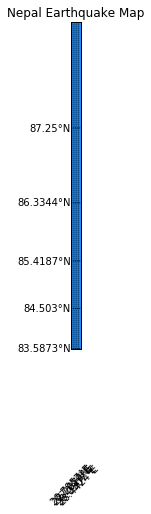

In [54]:
# from mpl_toolkits.basemap import Basemap
# import matplotlib.pyplot as plt
# import numpy as np

# plt.figure(figsize=(12,6))
# # Define the projection, scale, the corners of the map, and the resolution.
# m = Basemap(projection='merc',llcrnrlat=BBox[0],urcrnrlat=BBox[1],\
#             llcrnrlon=BBox[2],urcrnrlon=BBox[3],lat_ts=10,resolution='i')

# # Draw coastlines and fill continents and water with color
# m.drawcoastlines()
# m.fillcontinents(color='peru',lake_color='dodgerblue')

# # draw parallels, meridians, and color boundaries
# m.drawparallels(np.arange(BBox[0],BBox[1],(BBox[1]-BBox[0])/5),labels=[1,0,0,0])
# m.drawmeridians(np.arange(BBox[2],BBox[3],(BBox[3]-BBox[2])/5),labels=[0,0,0,1],rotation=45)
# m.drawmapboundary(fill_color='dodgerblue')

# # build and plot coordinates onto map
# x,y = m(coordinate_df.longitude, coordinate_df.latitude)
# m.plot(x,y,marker='D',color='r')
# plt.title("Nepal Earthquake Map")
# plt.savefig('map2.png', format='png', dpi=500)
# plt.show()

In [58]:
# !pip install geopandas

     |████████████████████████████████| 962 kB 1.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 354 kB/s eta 0:00:01
     |████████████████████████████████| 14.0 MB 1.9 MB/s eta 0:00:01


In [230]:
# !pip uninstall shapely

# !pip install shapely --no-binary shapely

Found existing installation: Shapely 1.7.1
Uninstalling Shapely-1.7.1:
  Would remove:
    /Users/Kevin/opt/anaconda3/lib/python3.7/site-packages/Shapely-1.7.1.dist-info/*
    /Users/Kevin/opt/anaconda3/lib/python3.7/site-packages/shapely/*
Proceed (y/n)? ^C
ERROR: Operation cancelled by user


In [253]:
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

# import street map
nepal = gpd.read_file('/Users/Kevin/Google Drive/UT MSBA/Advanced Predictive Modeling/iscgm_nepal_2008_polbndl')
# designate coordinate system
crs = {'init':'espc:4326'}
       
# zip x and y coordinates into single feature
geometry = [Point(xy) for xy in zip(coordinate_df2['longitude'], coordinate_df2['latitude'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(coordinate_df2,
 geometry = geometry)

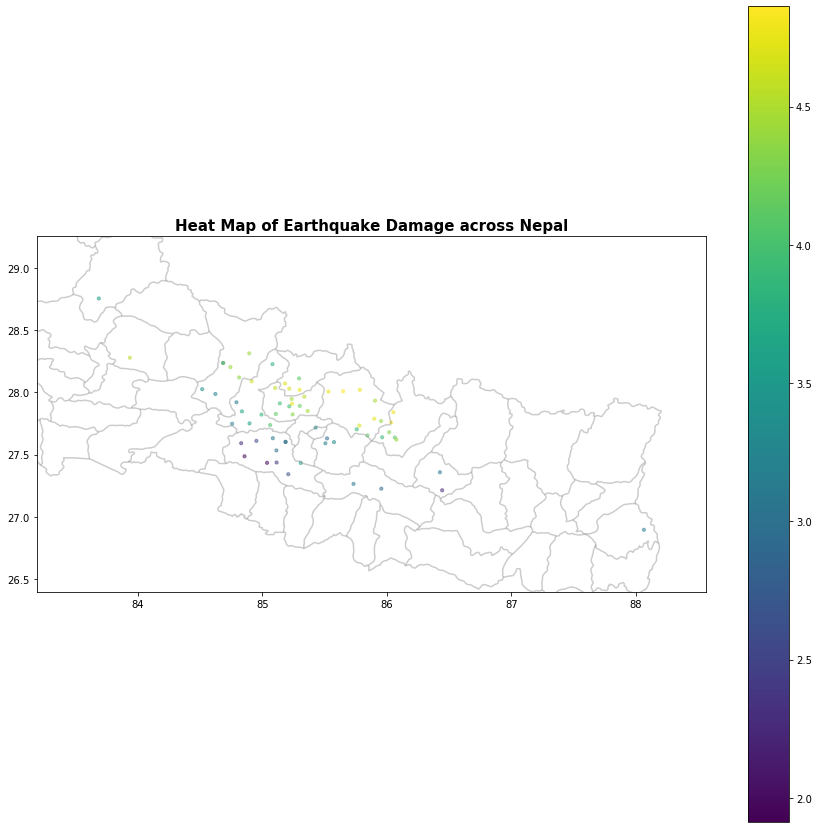

In [254]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(15,15))
# add .shp mapfile to axes
nepal.plot(ax=ax, alpha=0.4,color='grey')
# add geodataframe to axes
# assign ‘price’ variable to represent coordinates on graph
# add legend
# make datapoints transparent using alpha
# assign size of points using markersize
geo_df.plot(column='damage_grade_int',ax=ax,alpha=0.5, legend=True,markersize=10)
# add title to graph
plt.title('Heat Map of Earthquake Damage across Nepal', fontsize=15,fontweight='bold')
# set latitiude and longitude boundaries for map display
plt.xlim(83.187,88.566)
plt.ylim(26.396,29.254)
# show map
plt.show()

In [244]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [10]:
list1 = ['the', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog']
full = ' '.join(list1)
full.split(', ', len(list1)/3)

TypeError: integer argument expected, got float

In [13]:
# want to add words until adding the next word exceeds k = 16
running_total = 0
current_word_list = []
for i in list1:
    running_total += len(i)
    current_word_list.append(i)
    if running_total > 16:
        running_total - len(i)
        current_word_list = current_word_list.remove(i)
        current_string = ' '.current_word_list

3
5
5
3
5
4
3
4
3


In [24]:
30%16

14